In [4]:
import sys
sys.path.append("../lib/")
sys.path.append("../")

import pandas as pd

In [5]:
"""
take a look at the eval words
"""
pd.set_option('display.max_colwidth', None)
eval_words = pd.read_csv('../data/bnc_contexts_for_mcrae_homonyms.csv')
eval_words

,cue_word,lemma,context
0,bat_animal,Lemma('bat.n.01.bat'),"Or the surging whirling sounds of bats at night , when their black bodies dived into the blackness above and below the amber street lights ."
1,bat_animal,Lemma('bat.n.01.bat'),"Out of the church and into his big car , it tooling over the road with him driving and the headlights sweeping the pike ahead and after he hit college , his expansiveness , the quaint little pine board tourist courts , cabins really , with a cute naked light bulb in the ceiling ( unfrosted and naked as a streetlight , like the one on the corner where you used to play when you were a kid , where you watched the bats swooping in after the bugs , watching in between your bouts at hopscotch ) , a room complete with moths pinging the light and the few casual cockroaches cruising the walls , an insect Highway Patrol with feelers waving ."
2,board_wood,Lemma('board.n.02.board'),He just shot at the board and then drew circles around the holes to form a bull's-eye .
3,board_wood,Lemma('board.n.02.board'),Then I cover the sowing with a board .
4,board_wood,Lemma('board.n.02.board'),When the first sprinkling of green appears I remove the board .
5,board_wood,Lemma('board.n.02.board'),"Standing in the shelter of the tent - a rejected hospital tent on which the rain now dripped , no longer drumming - Adam watched his own hands touch the objects on the improvised counter of boards laid across two beef barrels ."
6,board_wood,Lemma('board.n.02.board'),"Beyond that misty gray of the rain , he saw the stretching hutment , low diminutive log cabins , chinked with mud , with doorways a man would have to crouch to get through , with roofs of tenting laid over boughs or boards from hardtack boxes , or fence rails , with cranky chimneys of sticks and dried mud ."
7,board_wood,Lemma('board.n.02.board'),"Over the door was a board with large , inept lettering :"
8,board_wood,Lemma('board.n.02.board'),"With enormous interest , Adam watched his hands as they touched and shifted the objects on the board directly before him ."
9,board_wood,Lemma('board.n.02.board'),"Alley fences were made of solid boards higher than one 's head , but not so high as the golden glow in a corner or the hollyhocks that grew in a line against them ."


In [108]:
"""
models and save paths

"""
buchanan_models = [
    '../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters',
    '../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters',
    '../trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300',
    #'../trained_models/model.modabs.buchanan.allbuthomoyms.5k',
    #'../trained_models/model.modabs.buchanan.allbuthomoyms.1k',
]

buchanan_glove_models = [
    '../trained_models/model.plsr.buchanan.allbuthomoyms.glove.300components.300max_iters',
    '../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.modabs.buchanan.allbuthomoyms.glove'   
]

mcrae_models = [
    '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters',
    '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.1k.50components.500max_iters',
]

mcrae_glove_models = [
    '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.glove.100components.300max_iters'
]

# Results analysis

In [56]:
mcrae_res_df = pd.read_csv('../results/homonymous_words_eval_mcrae_models.csv')
mcrae_res_df = mcrae_res_df.rename(columns={'Unnamed: 0': 'token_index'})
mcrae_res_df.head(5)

,token_index,cue_word,context,lemma,top_10_prec,top_20_prec,top_k_prec,top_10,top_10_gold,top_k,gold_feats,cos,avg_top_10_prec,avg_top_20_prec,avg_top_k_prec,avg_correlation,avg_cosine,model
0,0,bat_(animal),"Or the surging whirling sounds of bats at night , when their black bodies dived into the blackness above and below the amber street lights .",Lemma('bat.n.01.bat'),0.4,0.250000,0.375000,"['has_legs', 'an_insect', 'has_a_beak', 'has_feathers', 'beh_-_flies', 'is_large', 'an_animal', 'a_bird', 'is_black', 'has_wings']","['an_animal', 'beh_-_sleeps_upside_down', 'is_blind', 'has_fur', 'lives_in_caves', 'is_black', 'beh_-_flies', 'beh_-_is_nocturnal', 'has_wings', 'associated_with_vampires']","['has_fur', 'is_small', 'a_bird', 'has_legs', 'an_insect', 'has_4_legs', 'is_black', 'is_brown', 'has_wings', 'beh_-_flies', 'has_a_beak', 'is_large', 'an_animal', 'beh_-_eats', 'used_for_storage', 'has_feathers']","['has_wings', 'beh_-_flies', 'beh_-_is_nocturnal', 'is_black', 'lives_in_caves', 'has_fur', 'an_animal', 'beh_-_sleeps_upside_down', 'is_blind', 'beh_-_uses_radar_to_navigate', 'beh_-_screeches', 'a_mammal', 'has_fangs', 'is_scary', 'is_small', 'associated_with_vampires']",0.419403,0.272323,0.228756,0.246834,0.061188,0.352196,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300
1,1,bat_(animal),"Out of the church and into his big car , it tooling over the road with him driving and the headlights sweeping the pike ahead and after he hit college , his expansiveness , the quaint little pine board tourist courts , cabins really , with a cute naked light bulb in the ceiling ( unfrosted and naked as a streetlight , like the one on the corner where you used to play when you were a kid , where you watched the bats swooping in after the bugs , watching in between your bouts at hopscotch ) , a room complete with moths pinging the light and the few casual cockroaches cruising the walls , an insect Highway Patrol with feelers waving .",Lemma('bat.n.01.bat'),0.3,0.250000,0.250000,"['a_vegetable', 'is_black', 'made_of_metal', 'is_long', 'has_wings', 'beh_-_flies', 'is_green', 'an_insect', 'is_small', 'a_bird']","['an_animal', 'beh_-_sleeps_upside_down', 'is_blind', 'has_fur', 'lives_in_caves', 'is_black', 'beh_-_flies', 'beh_-_is_nocturnal', 'has_wings', 'associated_with_vampires']","['used_for_covering', 'has_legs', 'made_of_leather', 'a_fruit', 'a_vegetable', 'is_round', 'is_brown', 'is_black', 'made_of_metal', 'is_long', 'has_wings', 'beh_-_flies', 'is_green', 'an_insect', 'is_small', 'a_bird']","['has_wings', 'beh_-_flies', 'beh_-_is_nocturnal', 'is_black', 'lives_in_caves', 'has_fur', 'an_animal', 'beh_-_sleeps_upside_down', 'is_blind', 'beh_-_uses_radar_to_navigate', 'beh_-_screeches', 'a_mammal', 'has_fangs', 'is_scary', 'is_small', 'associated_with_vampires']",0.347850,0.272323,0.228756,0.246834,0.061188,0.352196,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300
2,2,board_(wood),He just shot at the board and then drew circles around the holes to form a bull's-eye .,Lemma('board.n.02.board'),0.2,0.153846,0.153846,"['made_of_metal', 'has_strings', 'beh_-_flies', 'is_long', 'a_bird', 'is_round', 'used_for_storage', 'made_of_wood', 'is_large', 'a_musical_instrument']","['used_by_pirates', 'used_for_building_things', 'is_long', 'made_of_wood', 'comes_from_trees', 'is_flat', 'is_hard', 'made_from_wood', 'is_brown', 'used_for_building_houses']","['different_colours', 'has_drawers', 'has_strings', 'has_wings', 'beh_-_flies', 'made_of_metal', 'is_long', 'a_bird', 'is_round', 'used_for_storage', 'made_of_wood', 'is_large', 'a_musical_instrument']","['made_of_wood', 'is_long', 'used_by_pirates', 'used_for_building_things', 'used_on_ships', 'is_brown', 'used_for_building_houses', 'used_for_construction', 'used_for_diving_boards', 'comes_from_trees', 'is_flat', 'is_hard', 'made_from_wood']",0.503791,0.272323,0.228756,0.246834,0.061188,0.352196,../trained_model

In [ ]:
# which model does best?

In [86]:
# which words get highest precision? lowest?

print(mcrae_res_df.model.unique())

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)


['../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300'
 '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300'
 '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters'
 '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.1k.50components.500max_iters'
 '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300'
 '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.glove.100components.300max_iters']


In [3]:
mcrae_res_df.columns

NameError: name 'mcrae_res_df' is not defined

In [88]:
# get best and worst performing words on plsr 5k --- avg prec .5
print(mcrae_res_df[mcrae_res_df.model == '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters'
].sort_values(by=['top_k_prec'], ascending=False).head(5))

print(mcrae_res_df[mcrae_res_df.model == '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters'
].sort_values(by=['top_k_prec'], ascending=True).head(5))

     token_index      cue_word      \
164      54       tank_(container)   
162      52       tank_(container)   
131      21           cap_(bottle)   
124      14           board_(wood)   
161      51            tank_(army)   

                                                                                                 context                                                                                               \
164                                                     The raw sewage was introduced directly under the turbine aerator to insure maximum mixing of the raw sewage with the aeration tank contents .   
162  There are some sharp and whipping lines and some hilariously funny situations - the best of the latter being a mass impromptu plunge into a nightclub tank where a `` mermaid '' is performing .   
131                                                                                                                              He said fussily , `` Just keep the cap 

In [89]:
# get best and worst performing words on ffnn 1k --- avg prec .5
print(mcrae_res_df[mcrae_res_df.model == '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300'
].sort_values(by=['top_k_prec'], ascending=False).head(5))

print(mcrae_res_df[mcrae_res_df.model == '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300'
].sort_values(by=['top_k_prec'], ascending=True).head(5))

     token_index      cue_word      \
109      54       tank_(container)   
107      52       tank_(container)   
75       20           bow_(weapon)   
105      50            tank_(army)   
77       22           cap_(bottle)   

                                                                                                                            context                                                                                                                           \
109                                                                                                            The raw sewage was introduced directly under the turbine aerator to insure maximum mixing of the raw sewage with the aeration tank contents .   
107                                                         There are some sharp and whipping lines and some hilariously funny situations - the best of the latter being a mass impromptu plunge into a nightclub tank where a `` mermaid '' is performing .   
75 

In [52]:
# get best and worst performing words on glove ffnn
print(mcrae_res_df[mcrae_res_df.model == '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300'
].sort_values(by=['top_k_prec'], ascending=False).head(5))

print(mcrae_res_df[mcrae_res_df.model == '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300'
].sort_values(by=['top_k_prec'], ascending=True).head(10))

     Unnamed: 0          cue_word  \
274          54  tank_(container)   
273          53  tank_(container)   
272          52  tank_(container)   
246          26             mouse   
256          36             mouse   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                    context  \
274                                                                                                                                                                                                                                                                                                                       

In [53]:
# get best and worst performing words on glove plsr
print(mcrae_res_df[mcrae_res_df.model == '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.glove.100components.300max_iters'
].sort_values(by=['top_k_prec'], ascending=False).head(5))

print(mcrae_res_df[mcrae_res_df.model == '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.glove.100components.300max_iters'
].sort_values(by=['top_k_prec'], ascending=True).head(10))

     Unnamed: 0      cue_word  \
295          20  bow_(weapon)   
302          27         mouse   
301          26         mouse   
303          28         mouse   
304          29         mouse   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                    context  \
295                                                                                                                                                                                                                                                                                                                                               

## Look at differential features for tank

In [91]:
# Lets look side by side at the predictions for a few homonymous pairs, across all models.
# we'll want to look at the gold features, the features predicted, and the scores, for each of the models

# tank
# army = 54
# container = 51

# get gold feats for tank
# print(mcrae_res_df[mcrae_res_df.token_index in (54, 51)][:1][['lemma','context', 'gold_feats']])
mcrae_res_df.loc[mcrae_res_df['token_index'].isin([54,51])][['lemma','context', 'gold_feats']][:2]



,lemma,context,gold_feats
51,Lemma('tank.n.01.tank'),Once Todman thought he had spotted a tank and went down to investigate while Greg covered him .,"['used_for_war', 'is_large', 'has_guns', 'is_green', 'made_of_metal', 'requires_a_crew', 'has_wheels', 'used_by_armies', 'has_tracks', 'is_bulletproof', 'is_heavy', 'is_powerful', 'used_for_destruction']"
54,Lemma('tank.n.02.tank'),The raw sewage was introduced directly under the turbine aerator to insure maximum mixing of the raw sewage with the aeration tank contents .,"['used_for_holding_things', 'made_of_metal', 'made_of_plastic', 'used_for_liquids', 'is_large', 'used_for_keeping_fish', 'used_for_holding_water', 'used_for_storage', 'different_sizes', 'made_of_glass']"


In [98]:
# get predicted feats for each of the models
mcrae_res_df.loc[mcrae_res_df['token_index'].isin([54,51])][['model','lemma','top_10_prec', 'top_10']].sort_values(by='model')


,model,lemma,top_10_prec,top_10
106,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('tank.n.01.tank'),0.3,"['found_in_kitchens', 'is_electrical', 'made_of_metal', 'a_vegetable', 'used_for_storage', 'used_for_transportation', 'is_large', 'is_green', 'has_wheels', 'is_loud']"
109,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('tank.n.02.tank'),0.5,"['a_fruit', 'is_green', 'made_of_plastic', 'made_of_glass', 'used_for_holding_things', 'found_in_kitchens', 'used_for_storage', 'is_small', 'made_of_metal', 'is_round']"
51,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('tank.n.01.tank'),0.3,"['used_for_war', 'is_loud', 'is_fast', 'made_of_glass', 'used_for_transportation', 'used_for_storage', 'used_for_holding_things', 'has_wheels', 'made_of_metal', 'is_large']"
54,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('tank.n.02.tank'),0.4,"['made_of_plastic', 'used_for_holding_things', 'found_in_kitchens', 'made_of_glass', 'used_for_killing', 'is_small', 'has_wheels', 'is_round', 'a_fruit', 'made_of_metal']"
271,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('tank.n.01.tank'),0.2,"['is_dangerous', 'is_loud', 'used_for_cooking', 'used_for_storage', 'made_of_metal', 'beh_-_flies', 'found_in_kitchens', 'a_weapon', 'used_for_killing', 'is_large']"
274,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('tank.n.02.tank'),0.3,"['is_dangerous', 'is_loud', 'used_for_cooking', 'used_for_storage', 'made_of_metal', 'beh_-_flies', 'found_in_kitchens', 'a_weapon', 'used_for_killing', 'is_large']"
216,../trained_models/model.plsr.mc_rae_real.allbuthomoyms.1k.50components.500max_iters,Lemma('tank.n.01.tank'),0.2,"['is_fast', 'found_in_kitchens', 'used_for_holding_things', 'is_round', 'has_4_wheels', 'is_loud', 'used_for_transportation', 'is_large', 'has_wheels', 'made_of_metal']"
219,../trained_models/model.plsr.mc_rae_real.allbuthomoyms.1k.50components.500max_iters,Lemma('tank.n.02.tank'),0.5,"['is_large', 'beh_-_swims', 'is_round', 'made_of_metal', 'made_of_plastic', 'used_for_storage', 'found_in_kitchens', 'used_for_transportation', 'used_for_holding_things', 'lives_in_water']"
161,../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters,Lemma('tank.n.01.tank'),0.4,"['used_for_holding_things', 'has_4_wheels', 'is_green', 'is_loud', 'used_for_war', 'found_in_kitchens', 'used_for_transportation', 'has_wheels', 'made_of_metal', 'is_large']"
164,../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters,Lemma('tank.n.02.tank'),0.5,"['is_small', 'lives_in_water', 'made_of_glass', 'is_loud', 'used_for_holding_things', 'made_of_plastic', 'used_for_storage', 'made_of_metal', 'used_for_transportation', 'found_in_kitchens']"


## Look at differentia features for pipe

In [99]:
# Lets look side by side at the predictions for a few homonymous pairs, across all models.
# we'll want to look at the gold features, the features predicted, and the scores, for each of the models

# pipe
# smoke = 38
# plumbing = 41

# get gold feats for pipe
mcrae_res_df.loc[mcrae_res_df['token_index'].isin([38,41])][['lemma','context', 'gold_feats']][:2]



,lemma,context,gold_feats
38,Lemma('pipe.n.01.pipe'),"He would order her to bring coffee , and would take from his vest pocket a thin black pipe which he would stuff - he would not remove his gloves - and light and smoke .","['used_for_smoking_tobacco', 'inbeh_-_produces_smoke', 'is_smelly', 'made_of_wood', 'used_by_inhaling', 'used_by_old_men', 'used_for_smoking_drugs']"
41,Lemma('pipe.n.02.pipe'),The effluent was collected through two pipes and discharged to the Blue River through a surface drainage ditch .,"['made_of_metal', 'is_round', 'is_long', 'is_hollow', 'used_for_carrying_water', 'used_for_holding_water', 'is_hard', 'made_of_copper', 'inbeh_-_leaks', 'made_of_plastic', 'used_for_transporting_liquids', 'has_connections']"


In [100]:
# get predicted feats for each of the models
mcrae_res_df.loc[mcrae_res_df['token_index'].isin([38,41])][['model','lemma','top_10_prec', 'top_10']].sort_values(by='model')


,model,lemma,top_10_prec,top_10
93,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('pipe.n.01.pipe'),0.143,"['a_musical_instrument', 'is_green', 'is_long', 'made_of_metal', 'used_for_cooking', 'has_a_handle', 'a_vegetable', 'made_of_plastic', 'is_smelly', 'is_round']"
96,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('pipe.n.02.pipe'),0.300,"['used_for_holding_things', 'is_round', 'made_of_glass', 'an_appliance', 'made_of_plastic', 'a_vegetable', 'made_of_metal', 'found_in_kitchens', 'is_electrical', 'used_for_cooking']"
38,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('pipe.n.01.pipe'),0.143,"['is_smelly', 'used_by_smoking', 'made_of_tobacco', 'causes_cancer', 'a_vegetable', 'made_of_plastic', 'made_of_metal', 'is_round', 'is_long', 'has_a_handle']"
41,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('pipe.n.02.pipe'),0.300,"['beh_-_swims', 'used_for_holding_things', 'is_small', 'lives_in_water', 'used_for_cooking', 'used_for_holding', 'is_round', 'made_of_plastic', 'made_of_metal', 'found_in_kitchens']"
258,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('pipe.n.01.pipe'),0.000,"['has_a_handle', 'is_electrical', 'made_of_glass', 'inbeh_-_produces_music', 'a_tool', 'is_green', 'is_loud', 'a_vegetable', 'a_musical_instrument', 'made_of_metal']"
261,../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300,Lemma('pipe.n.02.pipe'),0.100,"['has_a_handle', 'is_electrical', 'made_of_glass', 'inbeh_-_produces_music', 'a_tool', 'is_green', 'is_loud', 'a_vegetable', 'a_musical_instrument', 'made_of_metal']"
203,../trained_models/model.plsr.mc_rae_real.allbuthomoyms.1k.50components.500max_iters,Lemma('pipe.n.01.pipe'),0.286,"['inbeh_-_produces_smoke', 'made_of_tobacco', 'is_long', 'has_a_handle', 'made_of_plastic', 'is_smelly', 'causes_cancer', 'made_of_metal', 'found_in_kitchens', 'is_round']"
206,../trained_models/model.plsr.mc_rae_real.allbuthomoyms.1k.50components.500max_iters,Lemma('pipe.n.02.pipe'),0.200,"['used_for_transportation', 'made_of_wood', 'made_of_metal', 'used_for_cooking', 'made_of_plastic', 'a_fish', 'lives_in_water', 'beh_-_swims', 'found_in_kitchens', 'is_electrical']"
148,../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters,Lemma('pipe.n.01.pipe'),0.286,"['made_of_plastic', 'used_by_smoking', 'inbeh_-_produces_smoke', 'made_of_tobacco', 'causes_cancer', 'is_smelly', 'has_a_handle', 'is_round', 'made_of_metal', 'is_long']"
151,../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters,Lemma('pipe.n.02.pipe'),0.300,"['used_for_holding_things_together', 'used_for_holding', 'is_round', 'made_of_plastic', 'different_sizes', 'made_of_glass', 'found_in_bathrooms', 'used_for_transportation', 'found_in_kitchens', 'made_of_metal']"


# Correlate predicted features with wu-palmer similarity

use homonym token dataset
 lemma cue_word context 
 
add label row to df

Get predictions on 

In [101]:
df = pd.read_csv('../data/bnc_contexts_for_mcrae_homonyms.csv')
df.head(5)

,cue_word,lemma,context
0,bat_animal,Lemma('bat.n.01.bat'),"Or the surging whirling sounds of bats at night , when their black bodies dived into the blackness above and below the amber street lights ."
1,bat_animal,Lemma('bat.n.01.bat'),"Out of the church and into his big car , it tooling over the road with him driving and the headlights sweeping the pike ahead and after he hit college , his expansiveness , the quaint little pine board tourist courts , cabins really , with a cute naked light bulb in the ceiling ( unfrosted and naked as a streetlight , like the one on the corner where you used to play when you were a kid , where you watched the bats swooping in after the bugs , watching in between your bouts at hopscotch ) , a room complete with moths pinging the light and the few casual cockroaches cruising the walls , an insect Highway Patrol with feelers waving ."
2,board_wood,Lemma('board.n.02.board'),He just shot at the board and then drew circles around the holes to form a bull's-eye .
3,board_wood,Lemma('board.n.02.board'),Then I cover the sowing with a board .
4,board_wood,Lemma('board.n.02.board'),When the first sprinkling of green appears I remove the board .


In [102]:
# transform wordnet string into wordnet lemma

ws = []
wn_lemmas = []
for index, row in df.iterrows():
    lemma = re.findall(r"'(.*?)'", row.lemma)[0]
    lemma = wn.lemma(lemma)
    
    word = lemma.name()
    #print(word)
    ws.append(word)
    wn_lemmas.append(lemma)
    
df['label'] = ws
df['wn_lemma'] = wn_lemmas

df.head(5)


,cue_word,lemma,context,label,wn_lemma
0,bat_animal,Lemma('bat.n.01.bat'),"Or the surging whirling sounds of bats at night , when their black bodies dived into the blackness above and below the amber street lights .",bat,Lemma('bat.n.01.bat')
1,bat_animal,Lemma('bat.n.01.bat'),"Out of the church and into his big car , it tooling over the road with him driving and the headlights sweeping the pike ahead and after he hit college , his expansiveness , the quaint little pine board tourist courts , cabins really , with a cute naked light bulb in the ceiling ( unfrosted and naked as a streetlight , like the one on the corner where you used to play when you were a kid , where you watched the bats swooping in after the bugs , watching in between your bouts at hopscotch ) , a room complete with moths pinging the light and the few casual cockroaches cruising the walls , an insect Highway Patrol with feelers waving .",bat,Lemma('bat.n.01.bat')
2,board_wood,Lemma('board.n.02.board'),He just shot at the board and then drew circles around the holes to form a bull's-eye .,board,Lemma('board.n.02.board')
3,board_wood,Lemma('board.n.02.board'),Then I cover the sowing with a board .,board,Lemma('board.n.02.board')
4,board_wood,Lemma('board.n.02.board'),When the first sprinkling of green appears I remove the board .,board,Lemma('board.n.02.board')


In [103]:
def run_wu_palmer_analysis(df):
    """
    input is a dataframe with columns
        cue_word
        lemma
        context
        label
    """
    wup_sims = []
    cossine_sims = []

    for index, row in df.iterrows():
        word = row.label

        # select other examples of this token
        othertokens = df[df.label == word]
        # filter out the token itself
        othertokens = othertokens[othertokens.index != index]
        #print(othertokens)

        for index, otherword in othertokens.iterrows():
            # find the wordnet distance between these two wordnet senses
            synset1 = row.wn_lemma.synset()
            synset2 = otherword.wn_lemma.synset()

            wup_sim = synset1.wup_similarity(synset2)
            wup_sims.append(wup_sim)
            cossim = 1 - cosine(row.predictions, otherword.predictions)
            #cossim = 1 - cosine(row.single_prototype_model_preds, otherword.single_prototype_model_preds)
            cossine_sims.append(cossim)
            #print(synset1)
            #print(synset2)
            #print(wup_sim)
            #print(cossim)
    return (wup_sims, cossine_sims)

def plot_sims(wup_sims, cossine_sims):
    plt.scatter(wup_sims, cossine_sims)
    plt.title("Wordnet similarity of homonymous senses plotted against cosine similarity of predicted vectors of two tokens in semantic feature space")
    plt.xlabel("Wu and Palmer Similarity")
    plt.ylabel("Cosine Similarity")
    plt.show()

****************************************
*** doing wu palmer correlation for ../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300 ***
****************************************


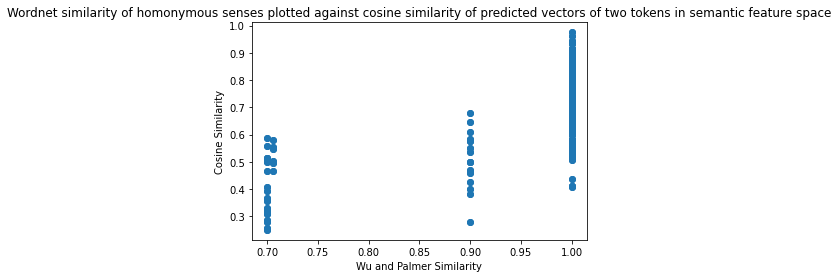

Pearsons correlation: 0.674, p-value: 4.205697557823494e-70
Spearmans correlation: 0.598, p-value: 1.0847684000217494e-51
****************************************
*** doing wu palmer correlation for ../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300 ***
****************************************


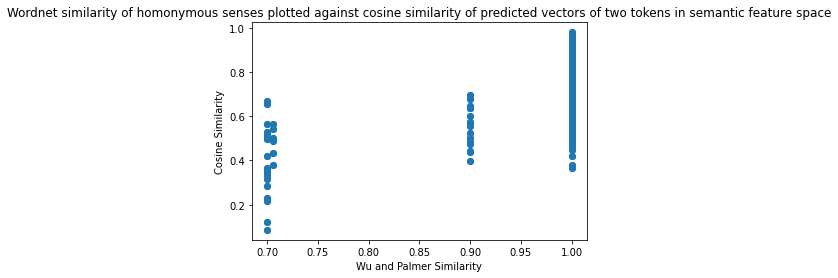

Pearsons correlation: 0.633, p-value: 1.096223909179035e-59
Spearmans correlation: 0.556, p-value: 1.3071997826121795e-43
****************************************
*** doing wu palmer correlation for ../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters ***
****************************************


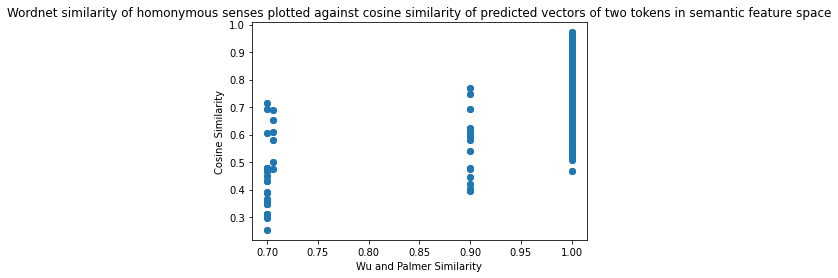

Pearsons correlation: 0.635, p-value: 5.32556606112468e-60
Spearmans correlation: 0.549, p-value: 2.553354822876444e-42
****************************************
*** doing wu palmer correlation for ../trained_models/model.plsr.mc_rae_real.allbuthomoyms.1k.50components.500max_iters ***
****************************************


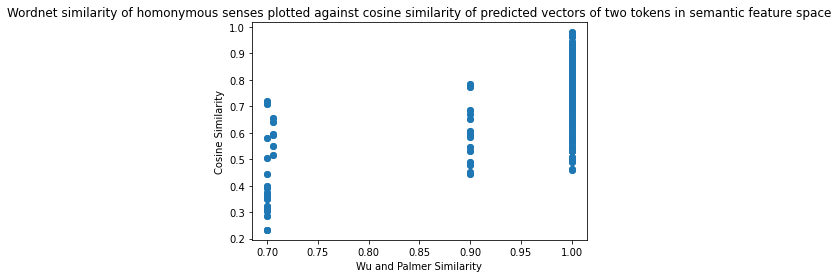

Pearsons correlation: 0.665, p-value: 1.2639409475163196e-67
Spearmans correlation: 0.553, p-value: 4.5631152740271384e-43


In [104]:
"""
create a list of predicted feature vectors for each of the models being evaluated
and then stick them in the dataframe
"""

for save_path in mcrae_models:
    print("****************************************")
    print("*** doing wu palmer correlation for %s ***" % save_path)
    print("****************************************")
    model = torch.load(save_path)
    
    predictions = []
    for index, row in df.iterrows():
            singular = row.wn_lemma.name()
            plural = pluralize(singular)

            try:
                predicted_vector = model.predict_in_context(singular, row.context, bert)
            except:
                predicted_vector = model.predict_in_context(plural, row.context, bert)


            predictions.append(predicted_vector)

    df['predictions'] = predictions
    
    wup_sims, cossine_sims = run_wu_palmer_analysis(df)
    plot_sims(wup_sims, cossine_sims)

    corr, p = pearsonr(wup_sims, cossine_sims)
    print('Pearsons correlation: %.3f, p-value: %s'  % (corr, p))

    corr, p = spearmanr(wup_sims, cossine_sims)
    print('Spearmans correlation: %.3f, p-value: %s'  % (corr, p))

# Run the analysis for the non-contextual model (trained on GloVe)

Here we expect to see no correlation, because the model should be making the same prediction for every token of a word form, irrespective of the surrounding context

****************************************
*** doing wu palmer correlation for ../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300 ***
****************************************


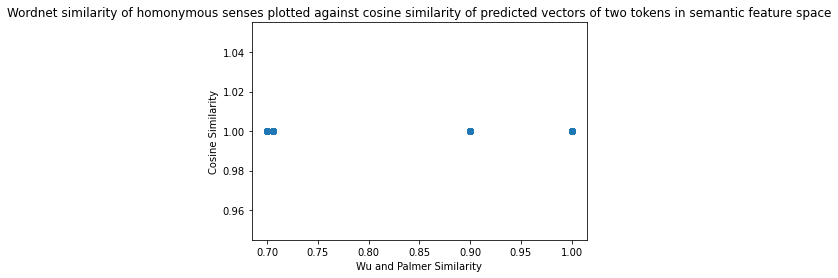

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Pearsons correlation: nan, p-value: nan
Spearmans correlation: nan, p-value: nan
****************************************
*** doing wu palmer correlation for ../trained_models/model.plsr.mc_rae_real.allbuthomoyms.glove.100components.300max_iters ***
****************************************


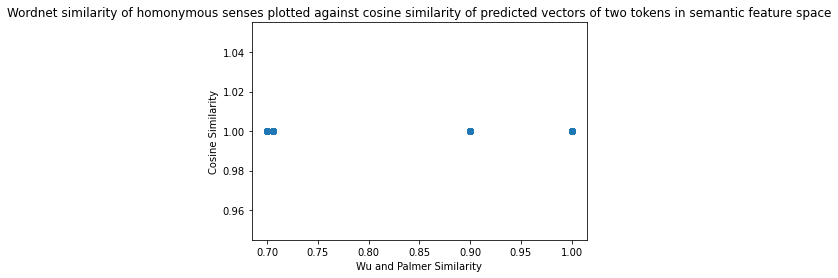

Pearsons correlation: nan, p-value: nan
Spearmans correlation: nan, p-value: nan


/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [105]:
"""
create a list of predicted feature vectors for each of the models being evaluated
and then stick them in the dataframe
"""

for save_path in mcrae_glove_models:
    print("****************************************")
    print("*** doing wu palmer correlation for %s ***" % save_path)
    print("****************************************")
    model = torch.load(save_path)
    
    predictions = []
    for index, row in df.iterrows():
            singular = row.wn_lemma.name()
            plural = pluralize(singular)

            try:
                predicted_vector = model.predict_in_context(singular, row.context, bert, glove=True)
            except:
                predicted_vector = model.predict_in_context(plural, row.context, bert, glove=True)


            predictions.append(predicted_vector)

    df['predictions'] = predictions
    
    wup_sims, cossine_sims = run_wu_palmer_analysis(df)
    plot_sims(wup_sims, cossine_sims)

    corr, p = pearsonr(wup_sims, cossine_sims)
    print('Pearsons correlation: %.3f, p-value: %s'  % (corr, p))

    corr, p = spearmanr(wup_sims, cossine_sims)
    print('Spearmans correlation: %.3f, p-value: %s'  % (corr, p))

In [ ]:
embeddings_list = []
word_indexer = Indexer()
with open("../data/glove.6B/glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_list.append([vector])

        #print(embeddings_dict)
        #raise Exception("hfelfnl")
        word_indexer.add_and_get_index(word)

embs = MultiProtoTypeEmbeddings(word_indexer, np.array(embeddings_list), 0, 1)
